In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np

sns.set(style="darkgrid")
pd.set_option('display.max_rows', 100) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [2]:
stud = pd.read_csv(r'C:\Users\novik\Desktop\SkillFactory\stud_math.xls')
stud

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


# Осмотр данных

In [30]:
stud.info()

# Датасет состоит из данных о 395 учениках, в датасете 30 колонок, 13 из которых числовые и 17 - строковые. 
# Во всех столбцах, кроме school, sex, age присутствуют пустые значения.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

# Первичный анализ данных в столбцах

Колонка school , процент пропусков: 0.0 %
Количество уникальных признаков: 2


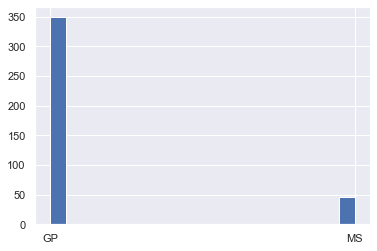

Колонка sex , процент пропусков: 0.0 %
Количество уникальных признаков: 2


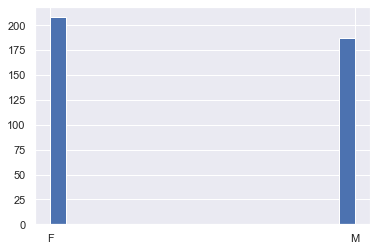

Колонка age , процент пропусков: 0.0 %
Количество уникальных признаков: 8


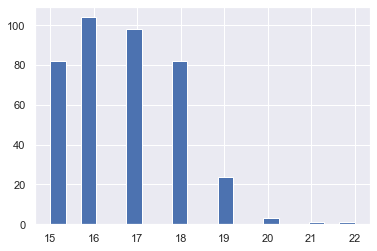

Колонка address , процент пропусков: 4.3 %
Количество уникальных признаков: 2


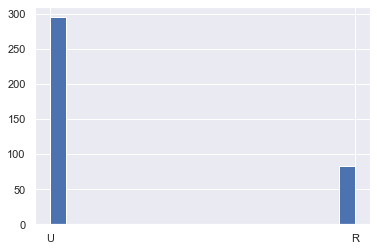

Колонка famsize , процент пропусков: 6.84 %
Количество уникальных признаков: 2


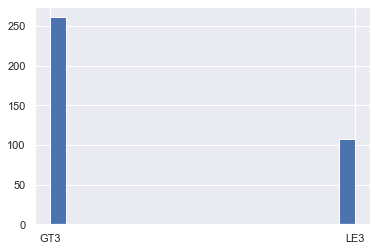

Колонка Pstatus , процент пропусков: 11.39 %
Количество уникальных признаков: 2


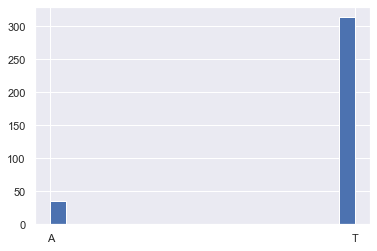

Колонка Medu , процент пропусков: 0.76 %
Количество уникальных признаков: 5


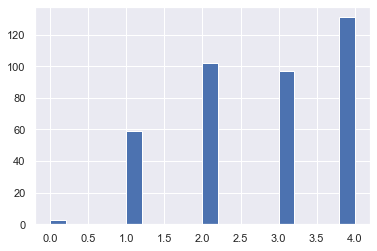

Колонка Fedu , процент пропусков: 6.08 %
Количество уникальных признаков: 6


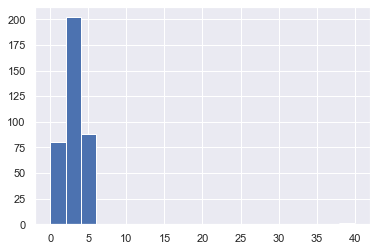

Колонка Mjob , процент пропусков: 4.81 %
Количество уникальных признаков: 5


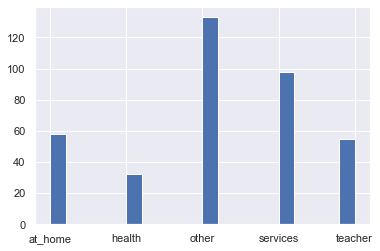

Колонка Fjob , процент пропусков: 9.11 %
Количество уникальных признаков: 5


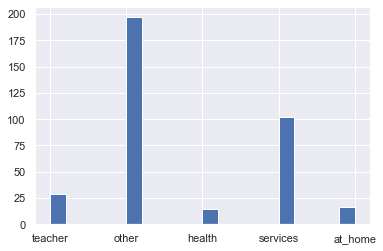

Колонка reason , процент пропусков: 4.3 %
Количество уникальных признаков: 4


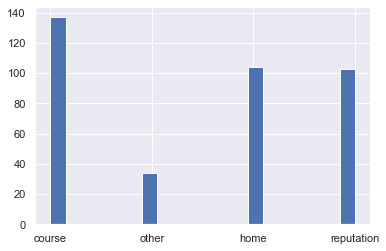

Колонка guardian , процент пропусков: 7.85 %
Количество уникальных признаков: 3


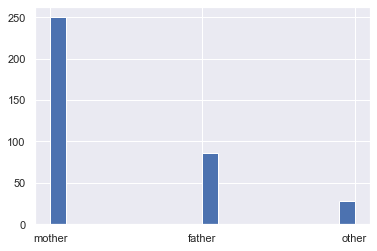

Колонка traveltime , процент пропусков: 7.09 %
Количество уникальных признаков: 4


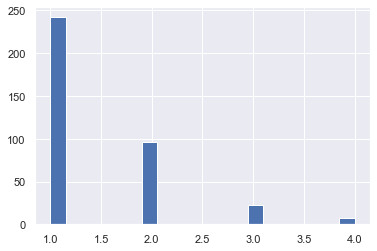

Колонка studytime , процент пропусков: 1.77 %
Количество уникальных признаков: 4


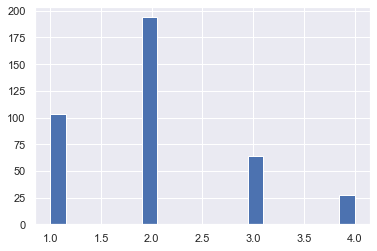

Колонка failures , процент пропусков: 5.57 %
Количество уникальных признаков: 4


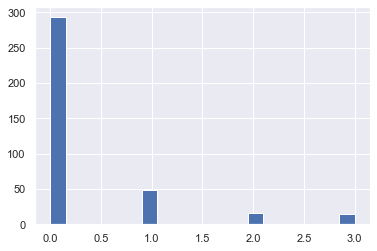

Колонка schoolsup , процент пропусков: 2.28 %
Количество уникальных признаков: 2


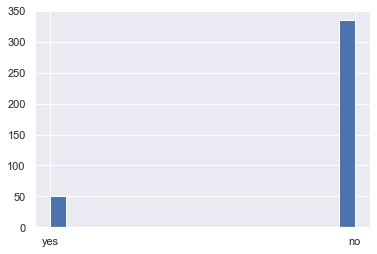

Колонка famsup , процент пропусков: 9.87 %
Количество уникальных признаков: 2


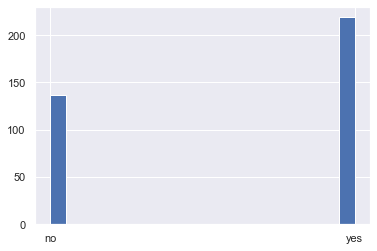

Колонка paid , процент пропусков: 10.13 %
Количество уникальных признаков: 2


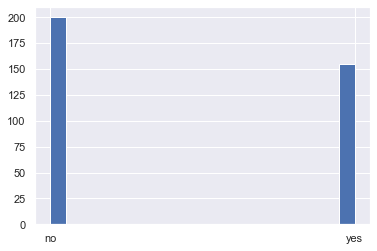

Колонка activities , процент пропусков: 3.54 %
Количество уникальных признаков: 2


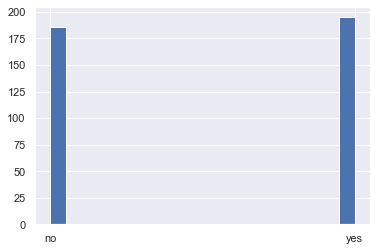

Колонка nursery , процент пропусков: 4.05 %
Количество уникальных признаков: 2


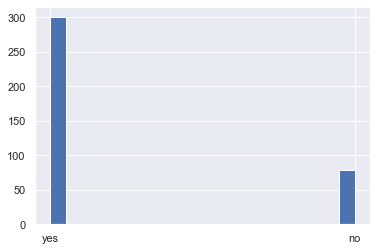

Колонка studytime, granular , процент пропусков: 1.77 %
Количество уникальных признаков: 4


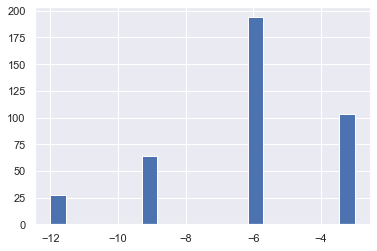

Колонка higher , процент пропусков: 5.06 %
Количество уникальных признаков: 2


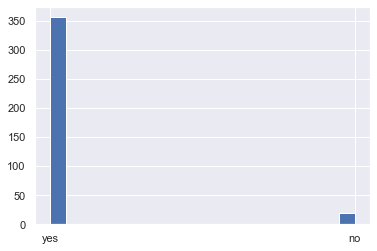

Колонка internet , процент пропусков: 8.61 %
Количество уникальных признаков: 2


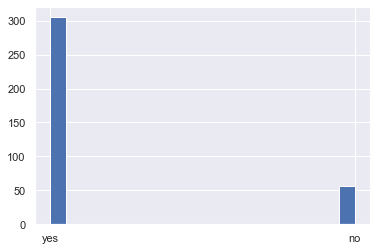

Колонка romantic , процент пропусков: 7.85 %
Количество уникальных признаков: 2


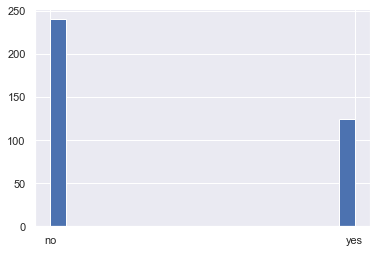

Колонка famrel , процент пропусков: 6.84 %
Количество уникальных признаков: 6


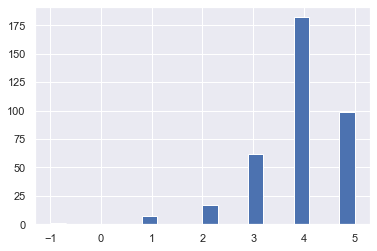

Колонка freetime , процент пропусков: 2.78 %
Количество уникальных признаков: 5


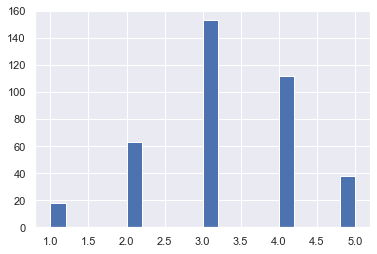

Колонка goout , процент пропусков: 2.03 %
Количество уникальных признаков: 5


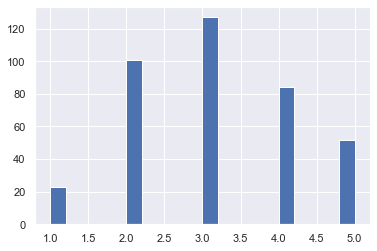

Колонка health , процент пропусков: 3.8 %
Количество уникальных признаков: 5


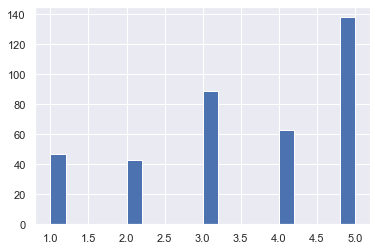

Колонка absences , процент пропусков: 3.04 %
Количество уникальных признаков: 36


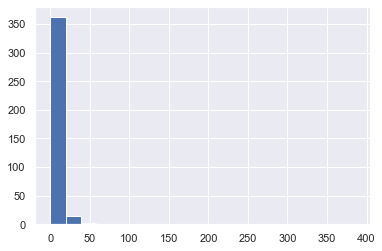

Колонка score , процент пропусков: 1.52 %
Количество уникальных признаков: 18


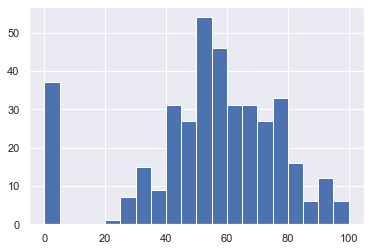

In [3]:
# Напишем функцию, которая покажет нам распределение признаков и процент пропусков

def analysis(col):
    print('Колонка', col, ', процент пропусков:', round(100 - stud.loc[:, col].count()/len(stud)*100,2),'%') #определяем процент пропусков
    print('Количество уникальных признаков:', stud[col].nunique()) # определим количество типов по каждому столбцу, они могут помочь определить выбросы
      
    fig, axes = plt.subplots()
    stud[col].hist(ax=axes, bins = 20)
    plt.show()

for col in stud.columns:
    analysis(col)
    
# Выводы: 
# 1. доля пропусков варьируется от 1% до 11%.
# 2. Ошибки заполнения (исходя из границ указанных в исходном задании) содержатся только в Fedu (>4), famrel (<0). Эти колонки рассмотрим отдельно.

In [5]:
# Fedu может содержать только целые значения от 0 до 4, остальные заменяем на None
stud['Fedu'] = stud['Fedu'].apply(lambda x: x if x in range(0, 5) else None)
stud['Fedu'].value_counts().sort_index()

0.0      2
1.0     78
2.0    106
3.0     96
4.0     88
Name: Fedu, dtype: int64

In [6]:
# Famrel может содержать только целые значения от 1 до 5, остальные заменяем на None
stud['famrel'] = stud['famrel'].apply(lambda x: x if x in range(1, 6) else None)
stud['famrel'].value_counts().sort_index()

1.0      7
2.0     17
3.0     62
4.0    182
5.0     99
Name: famrel, dtype: int64

In [13]:
# отдельно посмотрим на absences. -_-
stud['absences'].value_counts().sort_index()

0.0      111
1.0        3
2.0       60
3.0        8
4.0       53
5.0        5
6.0       31
7.0        6
8.0       21
9.0        3
10.0      17
11.0       2
12.0      12
13.0       2
14.0      12
15.0       2
16.0       7
17.0       1
18.0       5
19.0       1
20.0       4
21.0       1
22.0       3
23.0       1
24.0       1
25.0       1
26.0       1
28.0       1
30.0       1
38.0       1
40.0       1
54.0       1
56.0       1
75.0       1
212.0      1
385.0      1
Name: absences, dtype: int64

In [7]:
# существенно выделяются 2 значения > 100, уберем их и заменим пропуски на None
stud['absences'] = stud['absences'].apply(lambda x: x if x < 100 else None)


# Корреляционный анализ

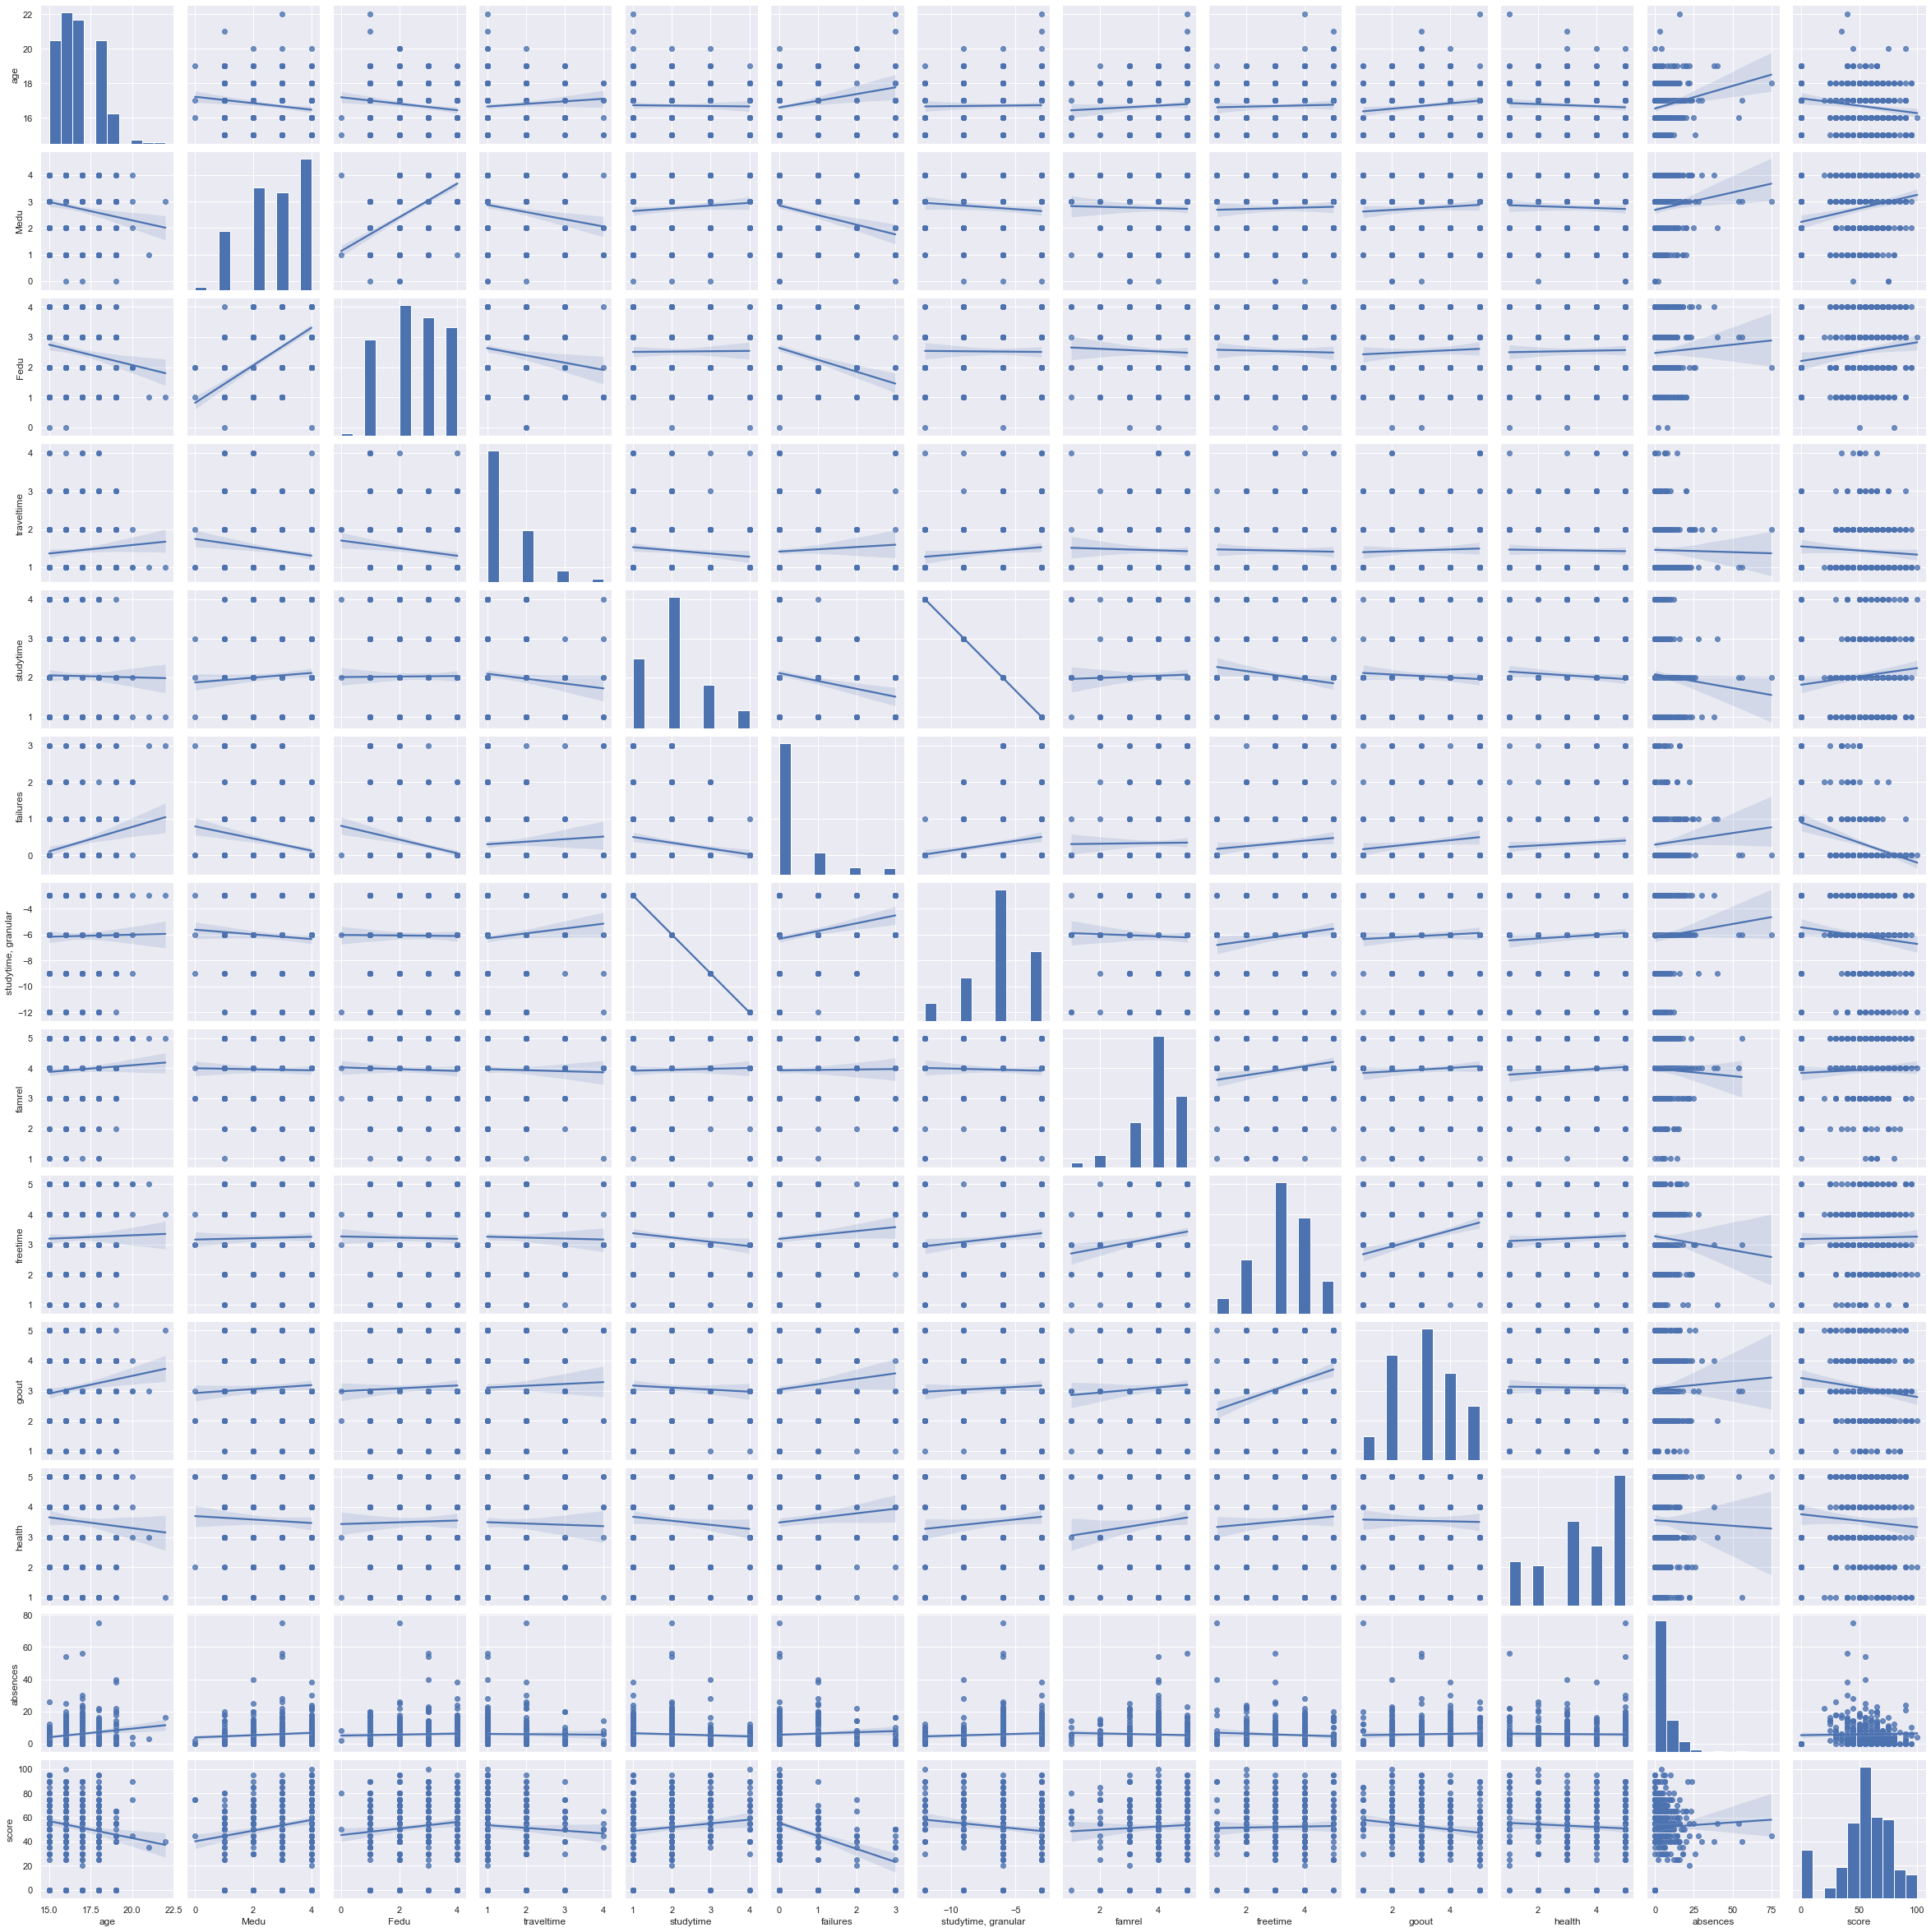

In [8]:
sns.pairplot(stud, kind = 'reg')

In [9]:
stud.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.159546,0.081508,-0.015556,0.228047,0.015556,0.063539,0.029023,0.135107,-0.065946,0.166773,-0.155726
Medu,-0.161704,1.000000,0.629956,-0.173515,0.078589,-0.245463,-0.078589,-0.020896,0.025335,0.064164,-0.045051,0.097295,0.213349
Fedu,-0.159546,0.629956,1.000000,-0.155459,0.008603,-0.271936,-0.008603,-0.035788,-0.021415,0.046581,0.022588,0.041440,0.130002
traveltime,0.081508,-0.173515,-0.155459,1.000000,-0.102206,0.064699,0.102206,-0.028220,-0.021937,0.037636,-0.021531,-0.014040,-0.070559
studytime,-0.015556,0.078589,0.008603,-0.102206,1.000000,-0.178992,-1.000000,0.028918,-0.121969,-0.051280,-0.080016,-0.067734,0.115741
failures,0.228047,-0.245463,-0.271936,0.064699,-0.178992,1.000000,0.178992,0.011942,0.098382,0.120914,0.081284,0.069703,-0.344338
"studytime, granular",0.015556,-0.078589,-0.008603,0.102206,-1.000000,0.178992,1.000000,-0.028918,0.121969,0.051280,0.080016,0.067734,-0.115741
famrel,0.063539,-0.020896,-0.035788,-0.028220,0.028918,0.011942,-0.028918,1.000000,0.164324,0.069241,0.097910,-0.041527,0.051219
freetime,0.029023,0.025335,-0.021415,-0.021937,-0.121969,0.098382,0.121969,0.164324,1.000000,0.296437,0.061575,-0.070416,0.019026
goout,0.135107,0.064164,0.046581,0.037636,-0.051280,0.120914,0.051280,0.069241,0.296437,1.000000,-0.015608,0.036836,-0.129685


In [11]:
# Колонка studytime, granular обратнопропорционально коррелирует с studytime, уберём её нафиг
stud.drop('studytime, granular', axis=1, inplace=True)

# Вывод:
# все остальные переменные коррелируют слабо, коэффициент корреляции только колонок Medu и Fedu относительно высок. Удалять слабокоррелирующие переменные нельзя, т.к.удалится большая часть данных

# Анализ номинативных переменных

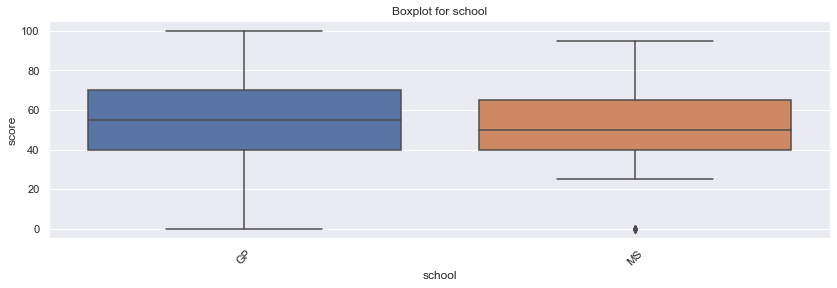

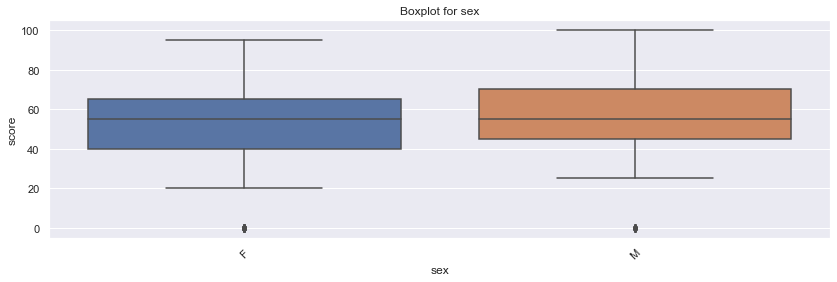

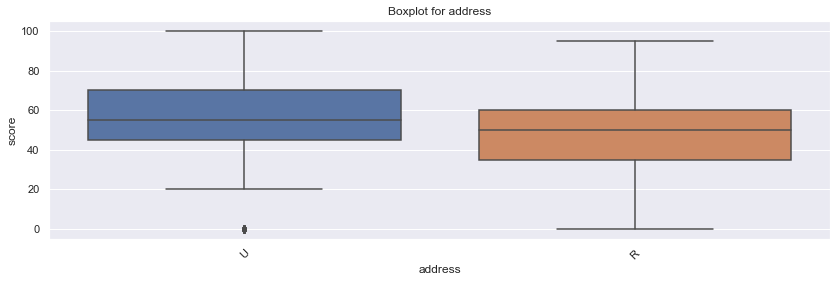

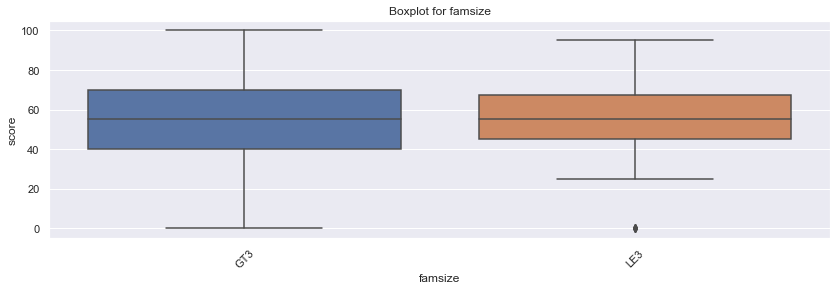

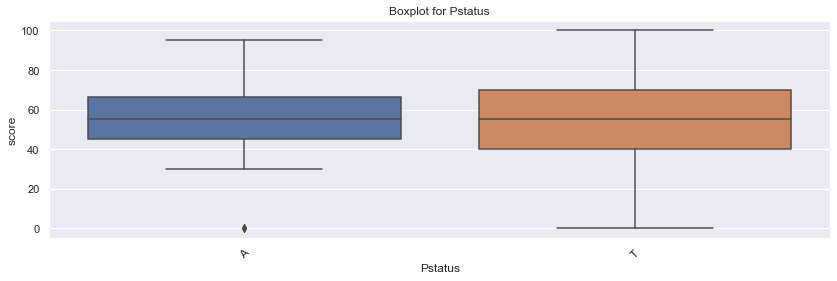

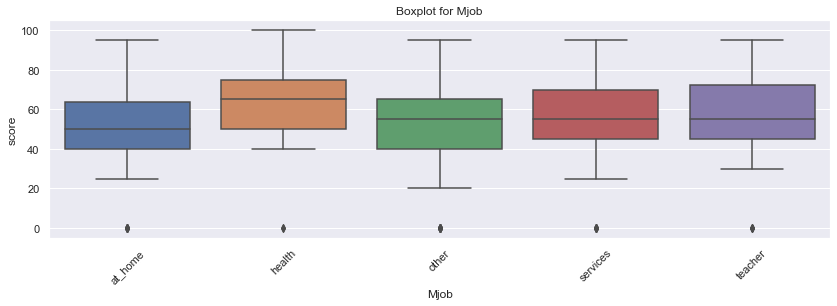

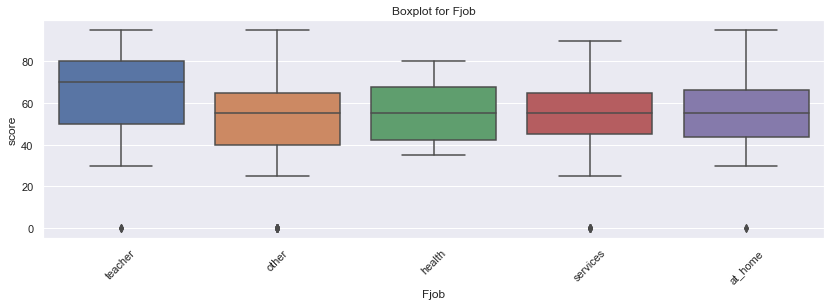

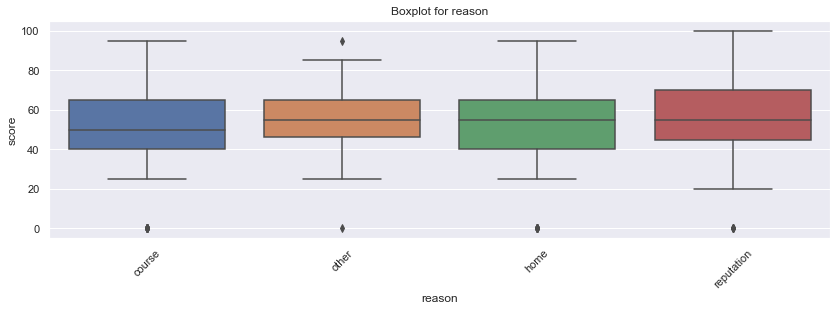

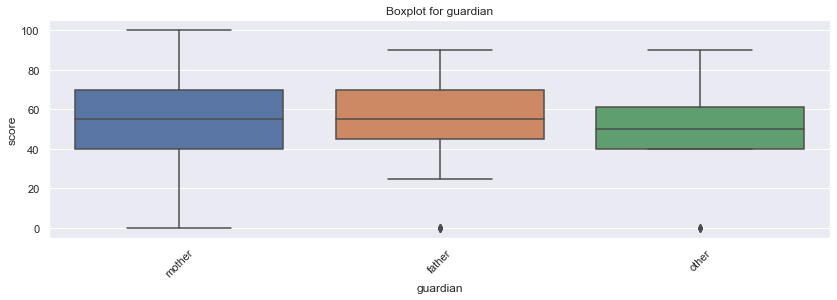

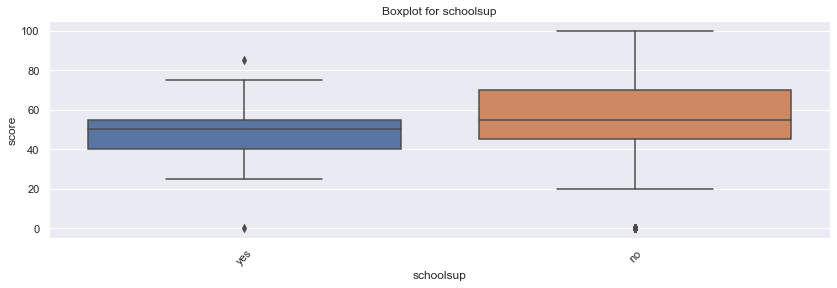

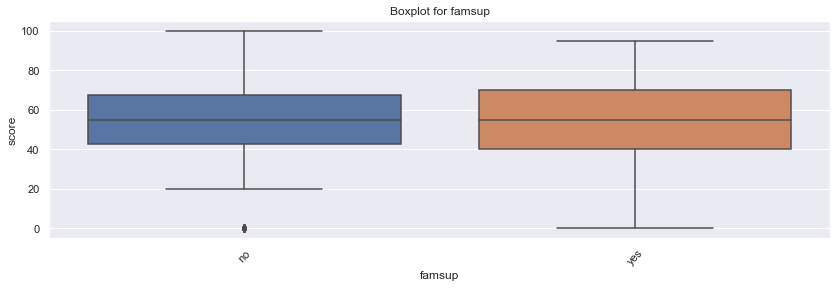

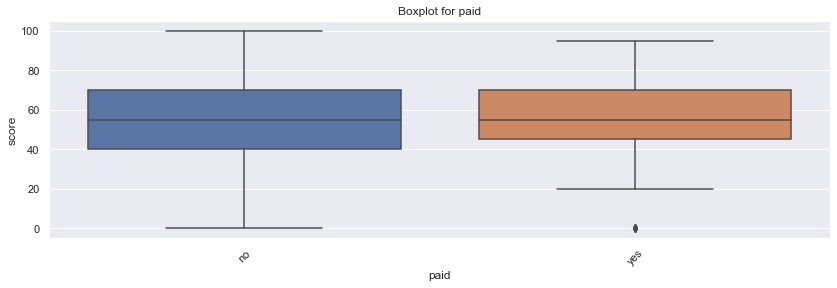

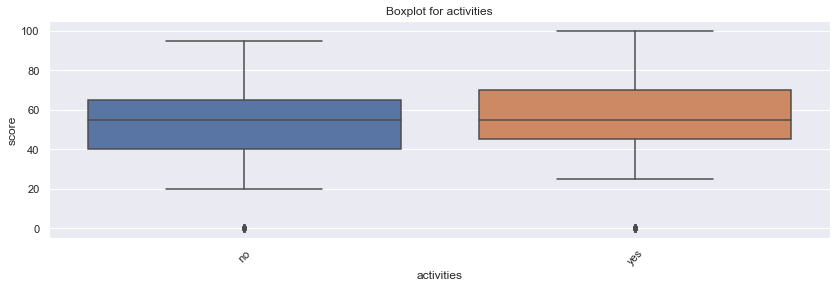

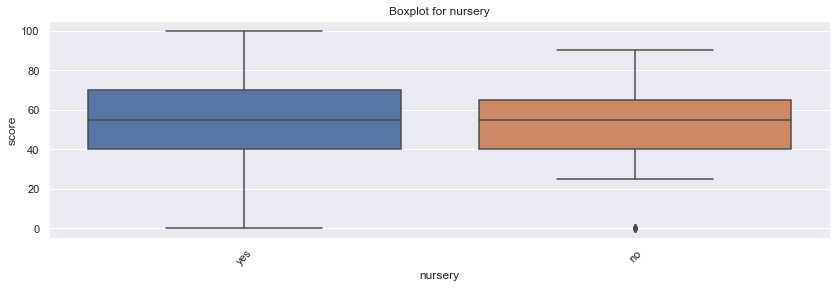

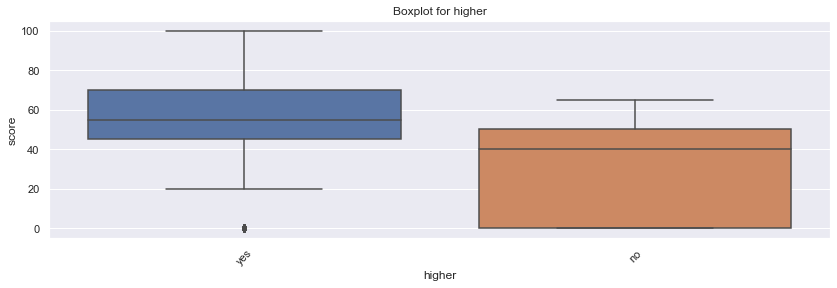

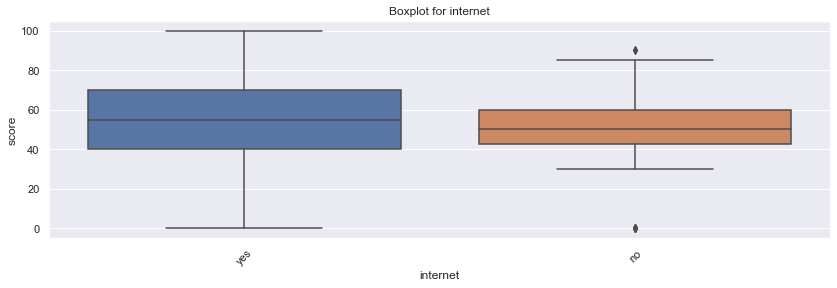

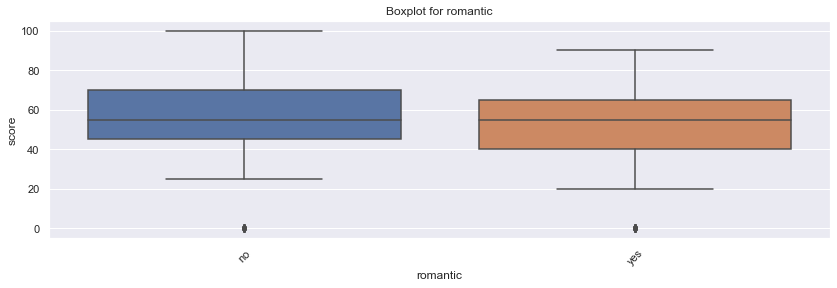

In [12]:
def nominative_analysis(col):
    if stud[col].dtype == 'O':
            fig, ax = plt.subplots(figsize = (14, 4))
            sns.boxplot(x=col, y='score', 
            data=stud.loc[stud.loc[:, col].isin(stud.loc[:, col].value_counts().index[:10])], ax=ax)
            plt.xticks(rotation=45)
            ax.set_title('Boxplot for ' + col)
            plt.show()
for col in stud.columns:
    nominative_analysis(col)

In [22]:
def get_stat_dif(col):
    if stud[col].dtype == 'O':
        combs = list(combinations(stud[col].dropna().value_counts().index, 2))
        for comb in combs:
            if ttest_ind(stud.loc[stud.loc[:, col] == comb[0], 'score'].dropna(), stud.loc[stud.loc[:, col] == comb[1], 'score'].dropna()).pvalue <= 0.10/len(combs): 
                print('Найдены статистически значимые различия для колонки', col)
                return True
        return False

for col in stud.columns:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


# Выводы:

- Почти во всех колонках, кроме school, sex, age, присутствуют пустые значения. Их доля варьируется от 1 до 11 процентов.
- Выбросы, обусловленные некачественным сбором данных, найдены в столбцах Fedu, famrel, absences.
- Состояние здоровья, пропуски, время до школы, отношения в семье, а также количество свободного времени после школы практически не коррелируют с успешностью.
- Для дальнейшего построения модели рекомендуется использовать параметры sex, address, Mjob, schoolsup, paid, higher, romantic.